In [14]:
import os
os.chdir("C:/Program Files/Stata18/utilities")
from pystata import config
config.init("mp")

## Problem 1
The goal of this exercise is to observe heteroskedasticity on simulated data.

1. Draw $x_1 \sim \mathcal{N}(2,3),aux \sim \mathcal{N}(0,1), n=10000$ times and generate $u=2x_1 \times aux, y=2+3x_1+u$.

In [15]:
%%stata -qui
clear
cd "D:\My Drive\Sciences Po\Spring 2025\Econometrics\HW\ScPo_M1_Econometrics2\HW6"
set obs 10000
*Generte x_1
gen x_1 = rnormal(2, sqrt(3))
*Generate aux
gen aux = rnormal()
*Generate u
gen u = 2 * x_1 * aux
*Generate y
gen y = 2 + 3 * x_1 + u

2. Regress $y$ on $x_1$. Show a scatter plot of the regression residuals on $x_1$. What do you observe?

In [16]:
%%stata
*Regree y on x_1
reg y x_1


. *Regree y on x_1
. reg y x_1

      Source |       SS           df       MS      Number of obs   =    10,000
-------------+----------------------------------   F(1, 9998)      =   9172.63
       Model |  251922.556         1  251922.556   Prob > F        =    0.0000
    Residual |  274591.026     9,998  27.4645956   R-squared       =    0.4785
-------------+----------------------------------   Adj R-squared   =    0.4784
       Total |  526513.582     9,999  52.6566239   Root MSE        =    5.2407

------------------------------------------------------------------------------
           y | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         x_1 |   2.888372   .0301583    95.77   0.000     2.829255    2.947488
       _cons |   2.031034   .0791741    25.65   0.000     1.875837    2.186231
------------------------------------------------------------------------------

. 


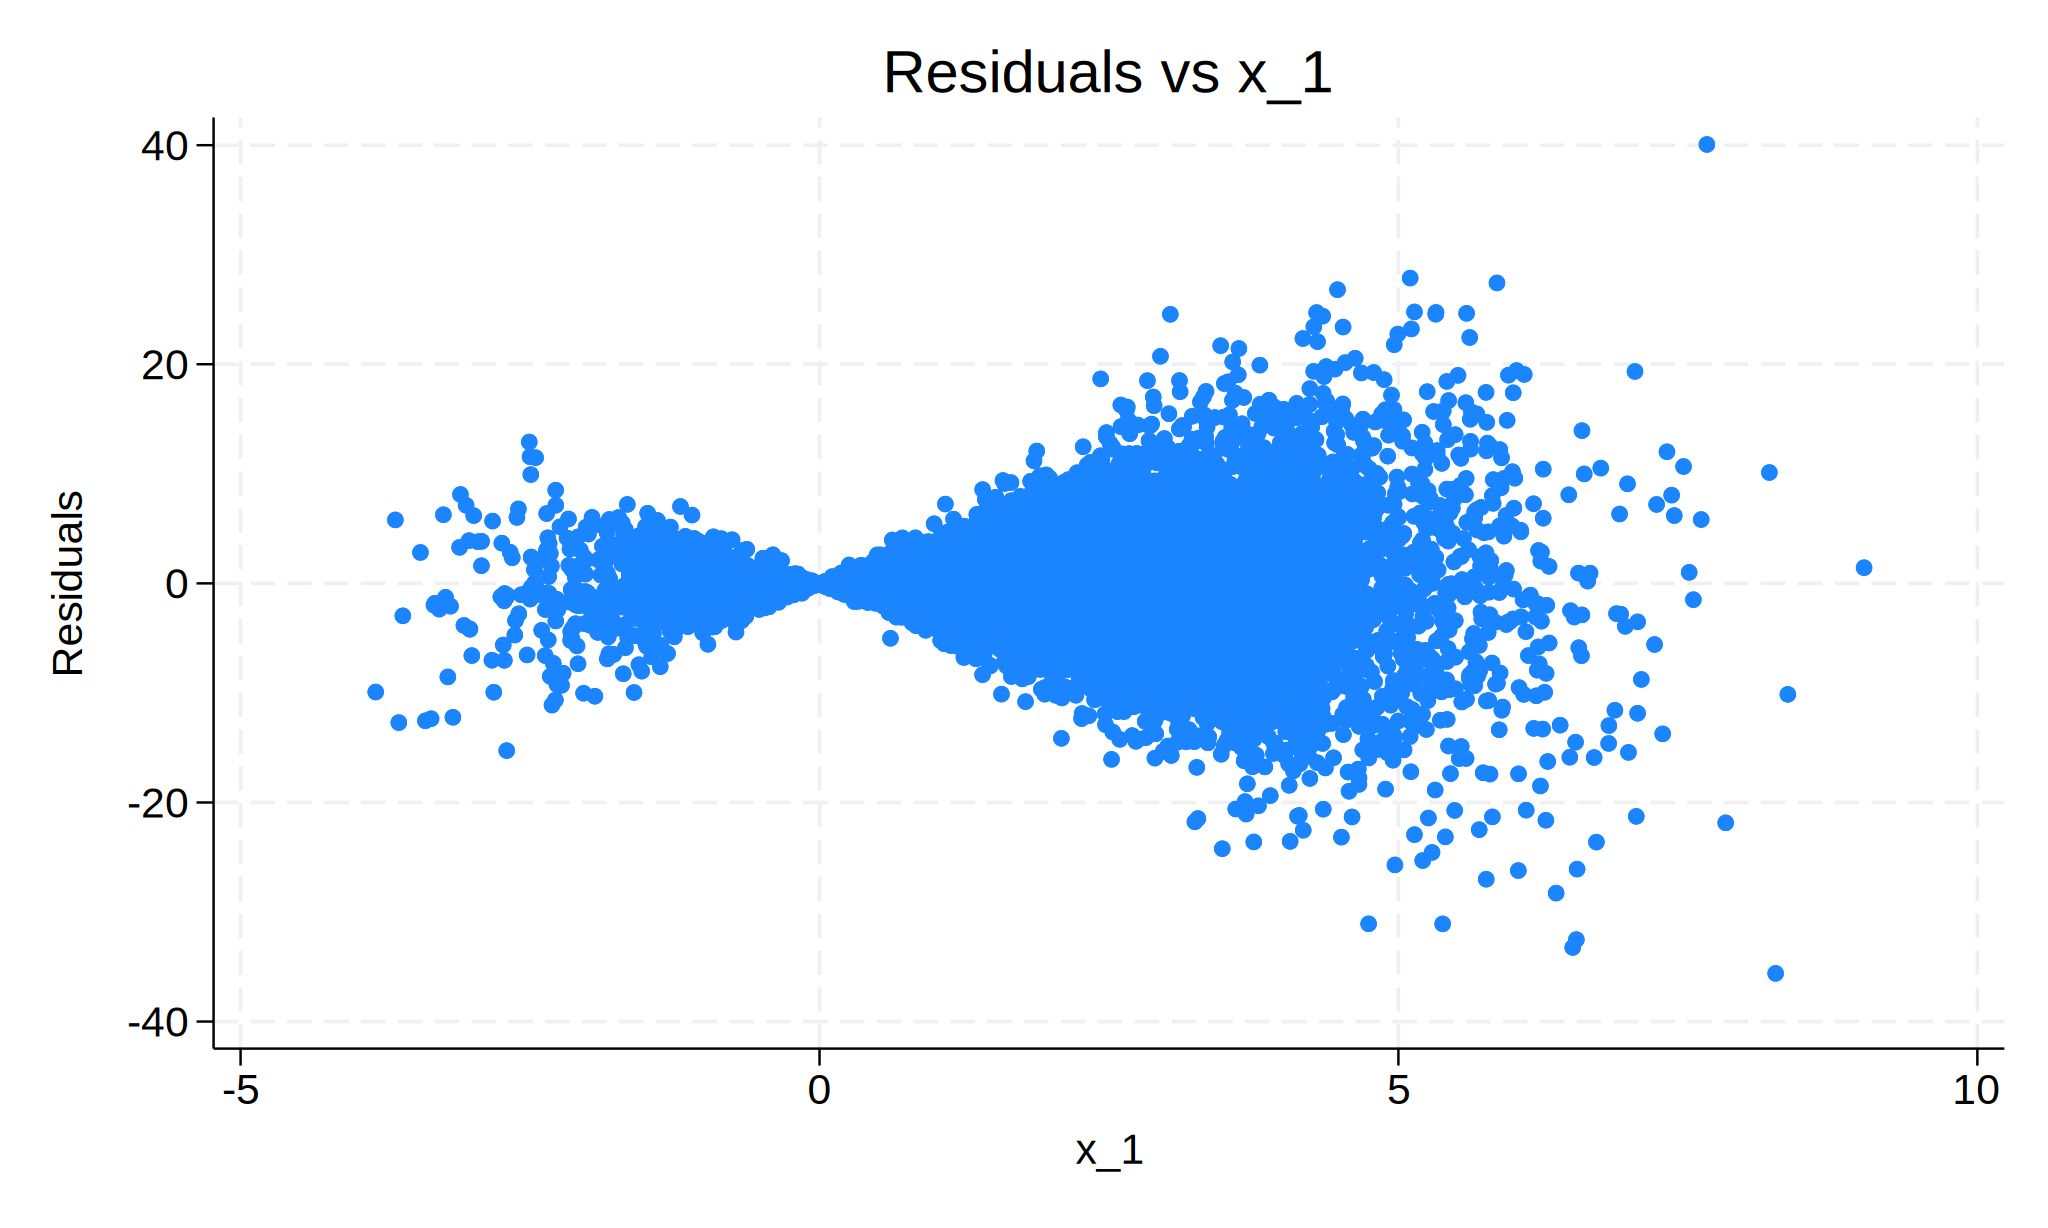

In [17]:
%%stata -qui
*Get residuals
predict res_1, resid
* Plot residuals vs x_1
scatter res_1 x_1, title("Residuals vs x_1") ytitle("Residuals") xtitle("x_1") legend(off)
graph export "Residuals vs x_1.png", replace

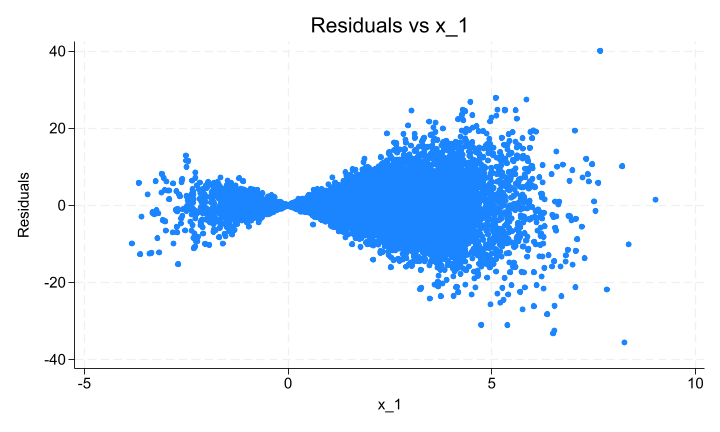

In [18]:
from IPython.display import Image
Image("Residuals vs x_1.png")

3. The White test aims at testing for heteroscedasticy. Its null hypothesis is $H_0:\sigma_i=\sigma_j \forall i, j$. Follow these steps to perform a White test:

    (a) Obtain predicted values $\hat{y}_i$ and residuals $\hat{u}_i$ from regression in 2.

In [19]:
%%stata -qui
*Generate predicted values for $\hat{y}_i$
predict y_hat



We already have the predicted residual calculated in 2.

 (b) Estimate the following model: $\hat{u}_i=\delta_0 + \delta_1 \hat{y}_i+ \delta_2 \hat{y}_i^2$. Call $R_\epsilon^2$ its R-squared.

In [20]:
%%stata
quietly {
    * Generate squared variables
    generate res_1_sq = res_1^2
    generate y_hat_sq = y_hat^2
}
* Run the regression
regress res_1_sq y_hat y_hat_sq


. quietly {

. * Run the regression
. regress res_1_sq y_hat y_hat_sq

      Source |       SS           df       MS      Number of obs   =    10,000
-------------+----------------------------------   F(2, 9997)      =   1320.87
       Model |  9586703.85         2  4793351.92   Prob > F        =    0.0000
    Residual |  36278428.8     9,997  3628.93156   R-squared       =    0.2090
-------------+----------------------------------   Adj R-squared   =    0.2089
       Total |  45865132.6     9,999  4586.97196   Root MSE        =    60.241

------------------------------------------------------------------------------
    res_1_sq | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       y_hat |  -1.854303   .2853489    -6.50   0.000    -2.413644   -1.294962
    y_hat_sq |   .4616862   .0168865    27.34   0.000     .4285853    .4947871
       _cons |   2.654355   1.241565     2.14   0.033     

(c) Under $H_0$ , the $nR_\epsilon^2$ statistics follows a $\mathcal{X}^2(2)$. Display the test threshold at the $5%$ level. What can you conclude.

In [21]:
%%stata
quietly {
    * save R-squared
scalar r2_val = e(r2)
}
* display the critical value
display invchi2(2, 0.95)
* generate nR^2
scalar nR2 = _N *r2_val
display nR2 


. quietly {

. * display the critical value
. display invchi2(2, 0.95)
5.9914645

. * generate nR^2
. scalar nR2 = _N *r2_val

. display nR2 
2090.1943

. 


Since the stats is greater than the critical value, we can reject the null hypothesis that there is homoskedasticity with the residuals.

(d) Perform the test directly using command imtest in Stata

In [22]:
%%stata
estat imtest, white


White's test
H0: Homoskedasticity
Ha: Unrestricted heteroskedasticity

    chi2(4) = 1042.10
Prob > chi2 =  0.0000

Cameron & Trivedi's decomposition of IM-test

--------------------------------------------------
              Source |       chi2     df         p
---------------------+----------------------------
  Heteroskedasticity |    1042.10      4    0.0000
            Skewness |     266.73      2    0.0000
            Kurtosis |       6.52      1    0.0107
---------------------+----------------------------
               Total |    1315.34      7    0.0000
--------------------------------------------------


As the p-value = 0, we can also reject the null hypothesis that there is homoskedasticity.

4. How can you account for heteroskedasticity directly in the original regression?Perform the regression with the relevant option. Are coefficients’s standard error larger or smaller when accounting for heteroskedasticity?

In [23]:
%%stata
reg y x_1, robust


Linear regression                               Number of obs     =     10,000
                                                F(1, 9998)        =    5011.04
                                                Prob > F          =     0.0000
                                                R-squared         =     0.4785
                                                Root MSE          =     5.2407

------------------------------------------------------------------------------
             |               Robust
           y | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         x_1 |   2.888372   .0408027    70.79   0.000      2.80839    2.968353
       _cons |   2.031034   .0570461    35.60   0.000     1.919212    2.142856
------------------------------------------------------------------------------


We can just use the robust option to account for the heteroskedasticity in the original regression. Due to the presense of heteroskedasticity, it is expected the robust standard error will be larger than the normal one and it is indeed the case shown in the results above.
